## SIS 6116: Artificial Intelligence Principles
### Labsheet: Topics 8-10

Identify an application area of one of the above concepts in your place of work, or alternatively in real life.
You are required to write a 2 pages report justifying your choice, as well as the design of a solution.
Note that no code is required.

### Application
Using Linear Regression to predict the salary of an employee based on its previous number of years of experience.

In [4]:
graphics_toolkit ("gnuplot");

In [5]:
dataset = dlmread("datasets/salary_data.csv");
x = dataset(:, 1); % years of experience 
y = dataset(:, 2); % salary per year (USD)

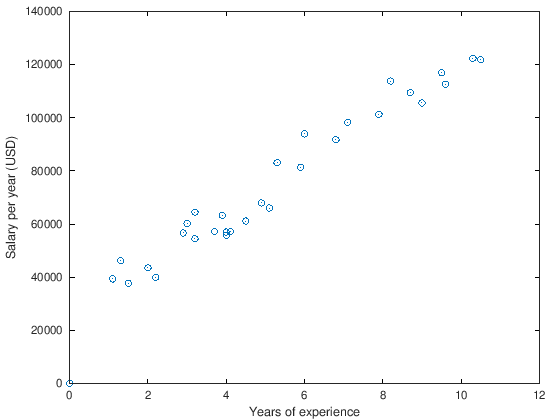

In [6]:
figure;
plot(x, y, 'o');
xlabel("Years of experience");
ylabel("Salary per year (USD)");

In [7]:
m = length(y); % number of training examples
X = [ones(m, 1), x];

In [8]:
theta = zeros(2, 1);
disp(theta);

   0
   0


In [9]:
iterations = 1500;
alpha = 0.0075;

In [10]:
function J = computeCost(X, y, theta)
    m = length(y);

    J = 0;

    predictions = X*theta;
    sqrErrors   = (predictions - y).^2;

    J = 1/(2*m) * sum(sqrErrors);
end

In [11]:
function [theta, J_history, iterationcount] = gradientDescent(X , y, theta, alpha, num_iters)
    m = length(y);
    J_history = zeros(num_iters, 1);
    iterationcount=zeros(num_iters, 1);
    
    for iter = 1:num_iters
        x = X (:,2);
    
        h = theta(1) + (theta(2)*x);

        theta_zero = theta(1) - alpha * (1/m) * sum(h-y);
        theta_one  = theta(2) - alpha * (1/m) * sum((h - y) .* x);

        theta = [theta_zero; theta_one];
        J_history(iter)= computeCost(X, y, theta);
        iterationcount(iter)=iter;
    end
end

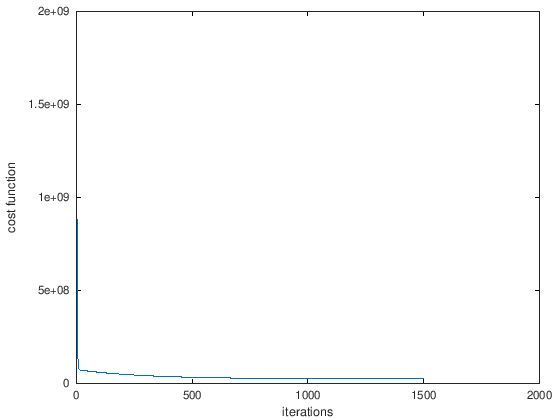

In [12]:
[theta, cost, count] = gradientDescent(X , y, theta, alpha, iterations);

figure;
plot(count, cost);
ylabel("cost function");
xlabel("iterations");

In [13]:
printf("theta 1: %i\n", theta(1));
printf("theta 2: %i\n", theta(2));

theta 1: 20918.5
theta 2: 10170.4


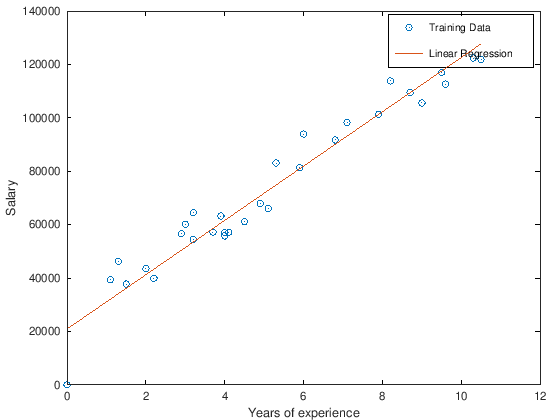

In [14]:
figure
plot(x, y, 'o');
ylabel('Salary');
xlabel('Years of experience');

hold on
plot(X(:, 2), X * theta, '-');
legend("Training Data", "Linear Regression");

### References:
- https://towardsdatascience.com/machine-learning-simple-linear-regression-with-python-f04ecfdadc13